# 重回帰

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pystan
%matplotlib inline
%precision 4
plt.style.use('ggplot')

# データの作成

In [2]:
def make_dataset(n, minv, maxv):
    a = 5
    bx = 3
    by = 4
    xs = (maxv - minv) * np.random.rand(n) + minv
    ys = (maxv - minv) * np.random.rand(n) + minv
    e = np.random.normal(loc=0, scale=2, size=n)
    return xs, ys, a + bx * xs + by * ys + e

In [3]:
xs, ys, zs = make_dataset(1000, -2, 2)
print(xs.shape)
print(ys.shape)
print(zs.shape)

(1000,)
(1000,)
(1000,)


# モデルの記述

In [4]:
model_code = """
data {
  int<lower=0> N;
  vector[N] xs;
  vector[N] ys;
  vector[N] zs;
}
parameters { 
  real alpha;
  real beta_x;
  real beta_y;
  real<lower=0> sigma;
}
model { 
  zs ~ normal(alpha + beta_x * xs + beta_y * ys, sigma);
}
"""

# モデルの構築

In [5]:
fit = pystan.stan(
    model_code=model_code, 
    data=dict(xs=xs, ys=ys, zs=zs, N=len(xs)))

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_1c2a77ac4f7c65228dc3a79f9c3c8c6a NOW.
/Users/kumada/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [6]:
fit

Inference for Stan model: anon_model_1c2a77ac4f7c65228dc3a79f9c3c8c6a.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha     5.1  9.8e-4   0.06   4.98   5.06    5.1   5.14   5.22   4000    1.0
beta_x   2.97  8.6e-4   0.05   2.86   2.93   2.97   3.01   3.07   4000    1.0
beta_y   3.99  9.0e-4   0.06   3.88   3.95   3.99   4.03    4.1   4000    1.0
sigma     2.0  6.9e-4   0.04   1.92   1.97    2.0   2.03   2.09   4000    1.0
lp__    -1192    0.03   1.35  -1195  -1192  -1191  -1191  -1190   2187    1.0

Samples were drawn using NUTS at Sun Apr 29 21:09:57 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

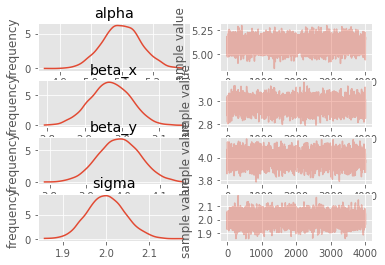

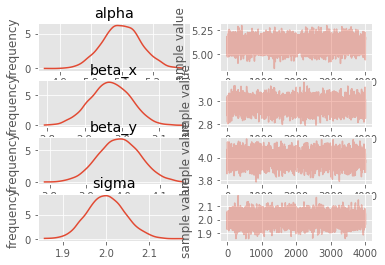

In [7]:
fit.plot()

# 計算結果

In [8]:
results = fit.extract(permuted=True)

In [9]:
alpha = np.mean(results['alpha'])
print(alpha)

5.100402464824578


In [10]:
beta_x = np.mean(results['beta_x'])
print(beta_x)

2.9692469593002677


In [11]:
beta_y = np.mean(results['beta_y'])
print(beta_y)

3.9897519150550425


In [12]:
sigma = np.mean(results['sigma'])
print(sigma)

2.001619234906512
